# Importing Needed Packages

In [3]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

%matplotlib inline

# Reading CSV file as weather_df and making date_time column as index of dataframe

In [253]:
weather_df = pd.read_csv('Barishal weather data 1.csv',parse_dates=['Period'], index_col='Period')
#weather_df['Period'] = pd.to_datetime(weather_df['Period'])
weather_df.head(5)

,StationNames,MaxTemp,MinTemp,Rainfall,RelativeHumidity,WindSpeed,CloudCoverage,BrightSunshine,StationNumber,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT
Period,,,,,,,,,,,,,,
1949-01-01,Barisal,29.4,12.3,0,68,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4
1950-01-01,Barisal,30.0,14.1,0,77,0.453704,0.8,7.831915,41950,536809.8,510151.9,22.7,90.36,4
1951-01-01,Barisal,28.2,12.3,0,77,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4
1952-01-01,Barisal,26.6,12.3,2,77,0.453704,1.0,7.831915,41950,536809.8,510151.9,22.7,90.36,4
1953-01-01,Barisal,30.0,13.3,10,75,0.453704,1.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4


# Checking columns in our dataframe

In [255]:
weather_df.columns

Index(['StationNames', 'MaxTemp', 'MinTemp', 'Rainfall', 'RelativeHumidity',
       'WindSpeed', 'CloudCoverage', 'BrightSunshine', 'StationNumber',
       'X_COR', 'Y_COR', 'LATITUDE', 'LONGITUDE', 'ALT'],
      dtype='object')

## Now shape

In [257]:
weather_df.shape

(780, 14)

In [259]:
weather_df.describe()

,MaxTemp,MinTemp,Rainfall,RelativeHumidity,WindSpeed,CloudCoverage,BrightSunshine,StationNumber,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT
count,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.0,7.800000e+02,7.800000e+02,7.800000e+02,7.800000e+02,780.0
mean,33.292692,21.351410,175.425641,82.141026,1.023611,3.715385,6.585638,41950.0,5.368098e+05,5.101519e+05,2.270000e+01,9.036000e+01,4.0
std,2.606314,4.983239,187.058250,6.359218,0.719903,2.150940,1.929572,0.0,7.338871e-09,4.892581e-09,3.306144e-13,4.834791e-13,0.0
min,26.600000,10.100000,0.000000,58.000000,0.000000,0.100000,1.800000,41950.0,5.368098e+05,5.101519e+05,2.270000e+01,9.036000e+01,4.0
25%,31.600000,17.250000,11.000000,77.000000,0.400000,1.700000,4.800000,41950.0,5.368098e+05,5.101519e+05,2.270000e+01,9.036000e+01,4.0
50%,33.800000,23.850000,114.000000,83.000000,0.900000,3.700000,7.100000,41950.0,5.368098e+05,5.101519e+05,2.270000e+01,9.036000e+01,4.0
75%,35.125000,25.500000,297.500000,87.000000,1.500000,5.700000,8.100000,41950.0,5.368098e+05,5.101519e+05,2.270000e+01,9.036000e+01,4.0
max,39.600000,27.200000,1067.000000,94.000000,5.100000,7.800000,10.800000,41950.0,5.368098e+05,5.101519e+05,2.270000e+01,9.036000e+01,4.0


# Checking is there any null values in dataset

In [261]:
weather_df.isnull().any()

StationNames        False
MaxTemp             False
MinTemp             False
Rainfall            False
RelativeHumidity    False
WindSpeed           False
CloudCoverage       False
BrightSunshine      False
StationNumber       False
X_COR               False
Y_COR               False
LATITUDE            False
LONGITUDE           False
ALT                 False
dtype: bool

### Now lets separate the feature (i.e. temperature) to be predicted from the rest of the featured. weather_x stores the rest of the dataset while weather_y has temperature column.

In [263]:
weather_df_num=weather_df.loc[:,['MaxTemp','MinTemp','CloudCoverage','RelativeHumidity','WindSpeed', 'Rainfall','BrightSunshine' ]]
weather_df_num.head()

,MaxTemp,MinTemp,CloudCoverage,RelativeHumidity,WindSpeed,Rainfall,BrightSunshine
Period,,,,,,,
1949-01-01,29.4,12.3,0.6,68,0.453704,0,7.831915
1950-01-01,30.0,14.1,0.8,77,0.453704,0,7.831915
1951-01-01,28.2,12.3,0.6,77,0.453704,0,7.831915
1952-01-01,26.6,12.3,1.0,77,0.453704,2,7.831915
1953-01-01,30.0,13.3,1.6,75,0.453704,10,7.831915


# Shape of new dataframe

In [265]:
weather_df_num.shape

(780, 7)

# Columns in new dataframe

In [267]:
weather_df_num.columns

Index(['MaxTemp', 'MinTemp', 'CloudCoverage', 'RelativeHumidity', 'WindSpeed',
       'Rainfall', 'BrightSunshine'],
      dtype='object')

## Ploting all the column values

array([<Axes: xlabel='Period'>, <Axes: xlabel='Period'>,
       <Axes: xlabel='Period'>, <Axes: xlabel='Period'>,
       <Axes: xlabel='Period'>, <Axes: xlabel='Period'>,
       <Axes: xlabel='Period'>], dtype=object)

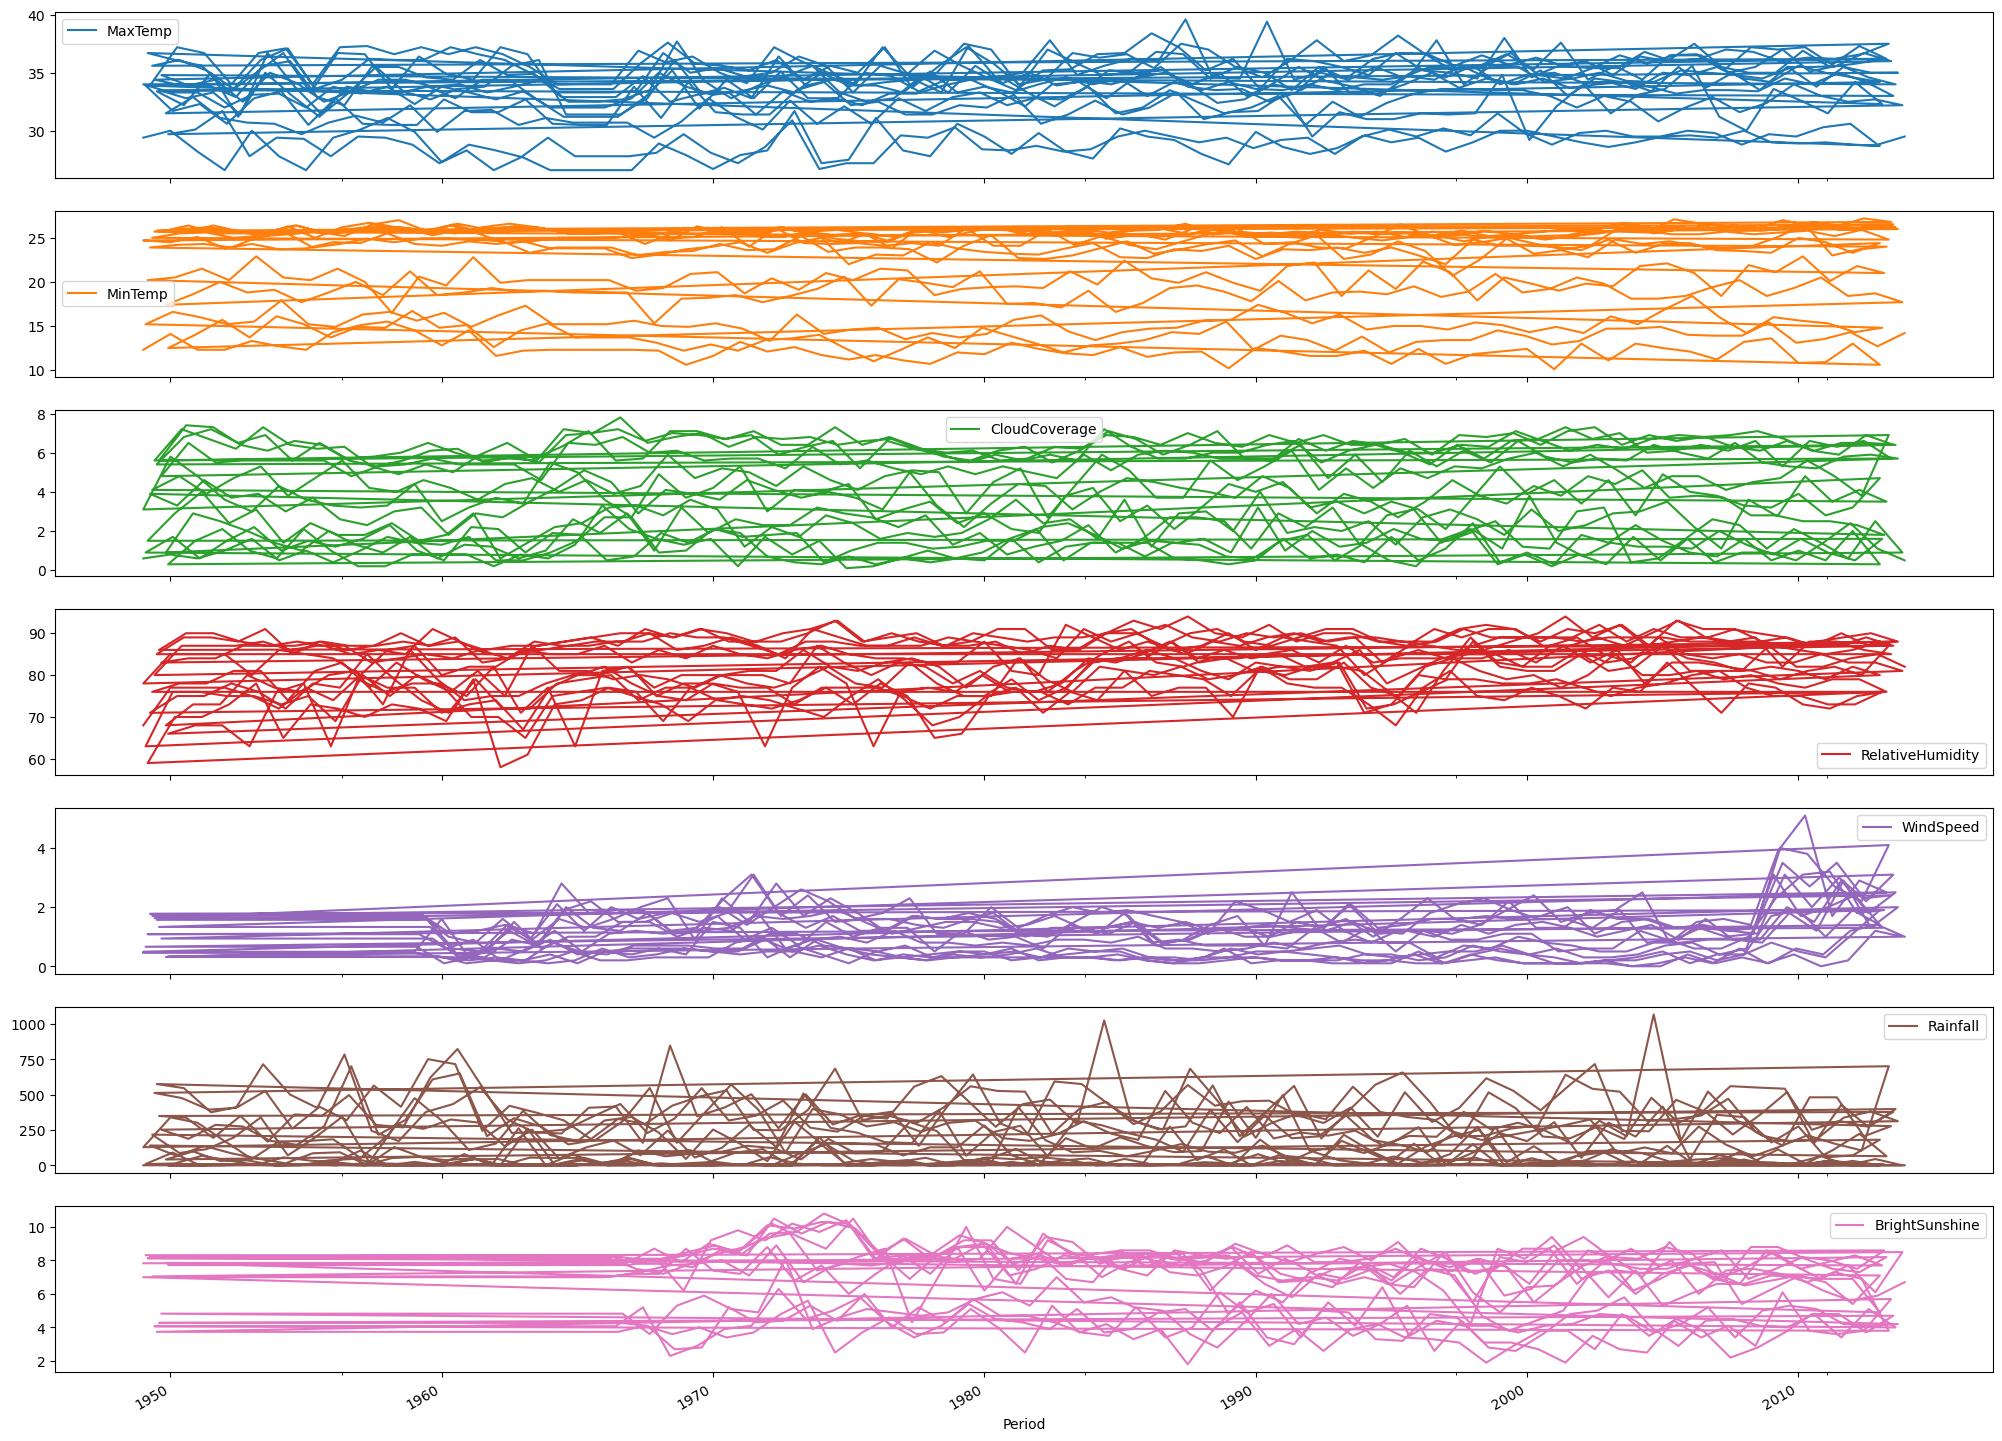

In [269]:
weather_df_num.plot(subplots=True, figsize=(25,20))

In [271]:
# Convert the index to DatetimeIndex if it's not already
weather_df_num.index = pd.to_datetime(weather_df_num.index)
# Sort the index
weather_df_num = weather_df_num.sort_index()
# Slice the data for 2003 to 2013
weth = weather_df_num['2003':'2013']
print(weth.head())


#weather_df_num['2003':'2013'].resample('D').fillna(method='pad').plot(subplots=True, figsize=(25,20))

            MaxTemp  MinTemp  CloudCoverage  RelativeHumidity  WindSpeed  \
Period                                                                     
2003-01-01     34.2     24.8            4.6                89        0.2   
2003-01-01     28.6     11.1            1.4                81        0.2   
2003-02-01     31.5     16.1            1.4                75        0.3   
2003-03-01     34.8     19.5            2.9                77        0.6   
2003-04-01     35.6     24.8            4.4                85        1.9   

            Rainfall  BrightSunshine  
Period                                
2003-01-01       301             5.8  
2003-01-01         0             7.4  
2003-02-01         4             8.2  
2003-03-01       117             7.8  
2003-04-01       104             8.1  


# Ploting all the column values for 1 year

array([[<Axes: title={'center': 'MaxTemp'}>,
        <Axes: title={'center': 'MinTemp'}>,
        <Axes: title={'center': 'CloudCoverage'}>],
       [<Axes: title={'center': 'RelativeHumidity'}>,
        <Axes: title={'center': 'WindSpeed'}>,
        <Axes: title={'center': 'Rainfall'}>],
       [<Axes: title={'center': 'BrightSunshine'}>, <Axes: >, <Axes: >]],
      dtype=object)

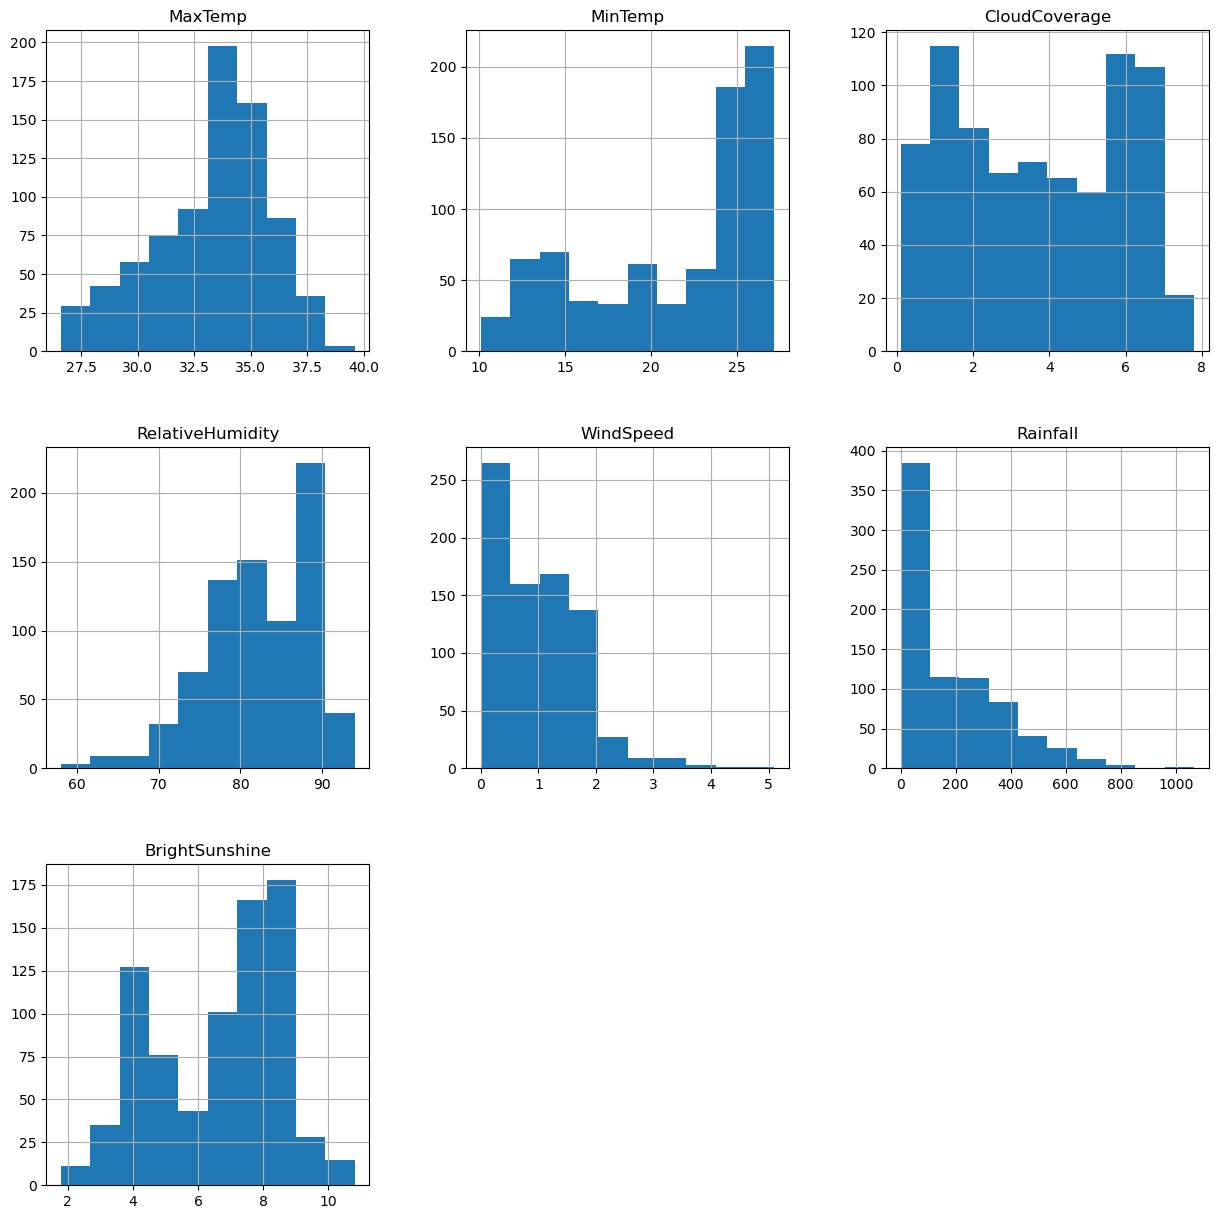

In [273]:
weather_df_num.hist(bins=10,figsize=(15,15))

In [275]:
weth=weather_df_num['2003':'2013']
weth.head()

,MaxTemp,MinTemp,CloudCoverage,RelativeHumidity,WindSpeed,Rainfall,BrightSunshine
Period,,,,,,,
2003-01-01,34.2,24.8,4.6,89,0.2,301,5.8
2003-01-01,28.6,11.1,1.4,81,0.2,0,7.4
2003-02-01,31.5,16.1,1.4,75,0.3,4,8.2
2003-03-01,34.8,19.5,2.9,77,0.6,117,7.8
2003-04-01,35.6,24.8,4.4,85,1.9,104,8.1


In [277]:
weather_y=weather_df_num.pop("MaxTemp")
weather_x=weather_df_num

### Now our dataset is prepared and it is ready to be fed to the model for training.it’s time to split the dataset into training and testing.

In [279]:
train_X,test_X,train_y,test_y=train_test_split(weather_x,weather_y,test_size=0.2,random_state=4)

In [281]:
train_X.shape

(624, 6)

In [283]:
train_y.shape

(624,)

### train_x has all the features except temperature and train_y has the corresponding temperature for those features. in supervised machine learning we first feed the model with input and associated output and then we check with a new input.

In [285]:
train_y.head()

Period
2006-07-01    33.5
1976-04-01    37.2
2005-03-01    36.0
1994-05-01    36.2
2010-01-01    28.9
Name: MaxTemp, dtype: float64

# Multiple Linear Regression

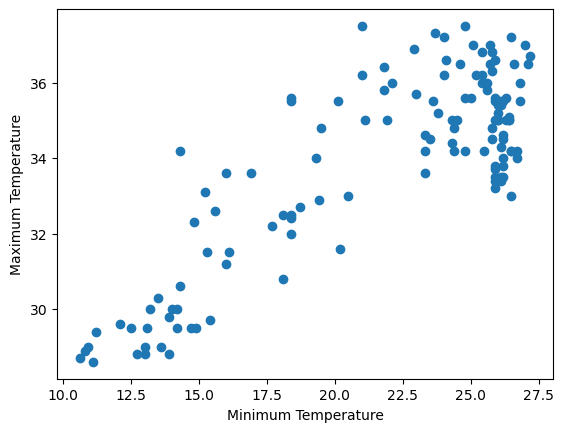

In [289]:
plt.scatter(weth.MinTemp, weth.MaxTemp)
plt.xlabel("Minimum Temperature")
plt.ylabel("Maximum Temperature")
plt.show()

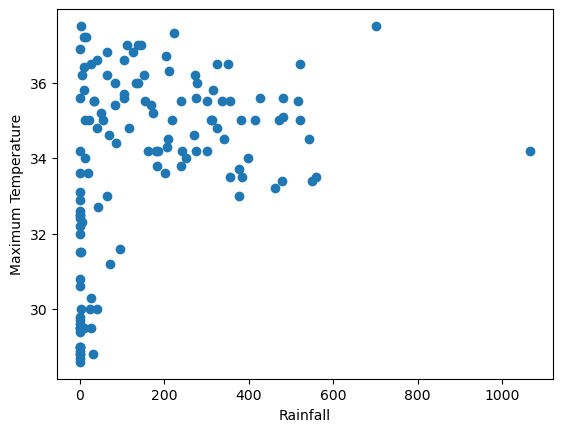

In [291]:
plt.scatter(weth.Rainfall, weth.MaxTemp)
plt.xlabel("Rainfall")
plt.ylabel("Maximum Temperature")
plt.show()

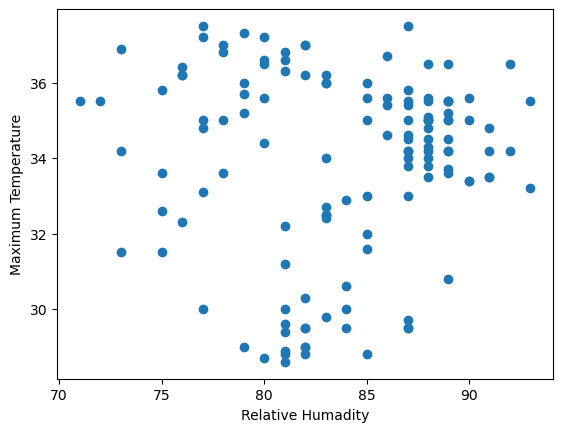

In [295]:
plt.scatter(weth.RelativeHumidity, weth.MaxTemp)
plt.xlabel("Relative Humadity")
plt.ylabel("Maximum Temperature")
plt.show()

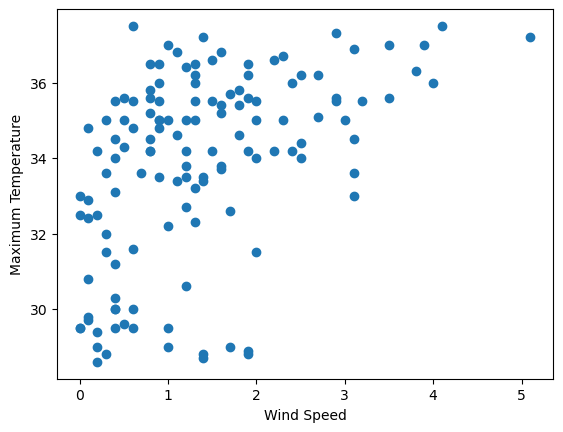

In [297]:
plt.scatter(weth.WindSpeed, weth.MaxTemp)
plt.xlabel("Wind Speed")
plt.ylabel("Maximum Temperature")
plt.show()

In [299]:
model=LinearRegression()
model.fit(train_X,train_y)

LinearRegression()

In [301]:
prediction = model.predict(test_X)

In [303]:
#calculating error
np.mean(np.absolute(prediction-test_y))

1.15018230887863

In [305]:
print('Variance score: %.2f' % model.score(test_X, test_y))

Variance score: 0.71


In [307]:
for i in range(len(prediction)):
  prediction[i]=round(prediction[i],2)
pd.DataFrame({'Actual':test_y,'Prediction':prediction,'diff':(test_y-prediction)})

,Actual,Prediction,diff
Period,,,
1976-06-01,34.2,33.65,0.55
1986-01-01,29.5,27.65,1.85
1968-01-01,28.9,29.61,-0.71
2011-01-01,35.0,34.87,0.13
1961-11-01,31.8,33.45,-1.65
...,...,...,...
1998-08-01,34.5,33.25,1.25
1985-01-01,30.2,28.53,1.67
1969-09-01,34.3,34.97,-0.67


# Decision Tree Regression 

In [309]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(train_X,train_y)

DecisionTreeRegressor(random_state=0)

In [311]:
prediction2=regressor.predict(test_X)
np.mean(np.absolute(prediction2-test_y))

1.3326923076923078

In [313]:
print('Variance score: %.2f' % regressor.score(test_X, test_y))

Variance score: 0.59


In [315]:
for i in range(len(prediction2)):
  prediction2[i]=round(prediction2[i],2)
pd.DataFrame({'Actual':test_y,'Prediction':prediction2,'diff':(test_y-prediction2)})

,Actual,Prediction,diff
Period,,,
1976-06-01,34.2,35.5,-1.3
1986-01-01,29.5,28.0,1.5
1968-01-01,28.9,29.4,-0.5
2011-01-01,35.0,33.3,1.7
1961-11-01,31.8,32.9,-1.1
...,...,...,...
1998-08-01,34.5,34.4,0.1
1985-01-01,30.2,28.2,2.0
1969-09-01,34.3,35.6,-1.3


# Random Forest Regression

In [317]:
from sklearn.ensemble import RandomForestRegressor
regr=RandomForestRegressor(max_depth=90,random_state=0,n_estimators=100)
regr.fit(train_X,train_y)

RandomForestRegressor(max_depth=90, random_state=0)

In [319]:
prediction3=regr.predict(test_X)
np.mean(np.absolute(prediction3-test_y))

0.9821602564102567

In [321]:
print('Variance score: %.2f' % regr.score(test_X, test_y))

Variance score: 0.79


In [323]:
for i in range(len(prediction3)):
  prediction3[i]=round(prediction3[i],2)
pd.DataFrame({'Actual':test_y,'Prediction':prediction3,'diff':(test_y-prediction3)})

,Actual,Prediction,diff
Period,,,
1976-06-01,34.2,33.19,1.01
1986-01-01,29.5,28.52,0.98
1968-01-01,28.9,29.08,-0.18
2011-01-01,35.0,34.06,0.94
1961-11-01,31.8,31.76,0.04
...,...,...,...
1998-08-01,34.5,33.73,0.77
1985-01-01,30.2,28.94,1.26
1969-09-01,34.3,34.57,-0.27


In [325]:
from sklearn.metrics import r2_score

# Calculating R2-score for Multiple Linear Regression

In [327]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,prediction ) )

Mean absolute error: 1.15
Residual sum of squares (MSE): 2.12
R2-score: 0.71


# Calculating R2-score for Decision Tree Regression

In [329]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction2 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction2 - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,prediction2 ) )

Mean absolute error: 1.33
Residual sum of squares (MSE): 3.05
R2-score: 0.59


# Calculating R2-score for Random Forest Regression

In [331]:
from sklearn.metrics import r2_score

print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction3 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction3 - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,prediction3 ) )

Mean absolute error: 0.98
Residual sum of squares (MSE): 1.59
R2-score: 0.79
